In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, GRU, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=f91dae254b83ed0b80c1d944e6d1372f51f94c110a2be2635e1ec8d0fa4ced88
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [2]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [4]:
df.head()
len(df)

10003

Split into train and test



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

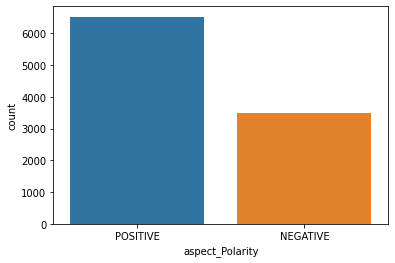

In [5]:
sns.countplot(df.aspect_Polarity)
df.aspect_Polarity.value_counts()

In [6]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


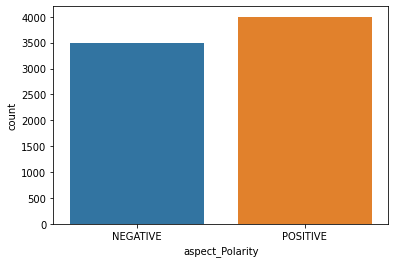

In [7]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [8]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [9]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
8805,8805,home away home stay cow hollow month home away...,5,home away home stay cow hollow month home away...,home away home stay cow hollow month home away...,0.273982,0.129882,0.236080,0.166717,0.172342,room,0.273982,NEGATIVE,0.993053
4668,4668,decent airport hotel below-average business tr...,3,decent airport hotel below average business tr...,looking place multiple night stay prefer mode...,0.310079,0.069885,0.291317,0.086518,0.040397,room,0.310079,NEGATIVE,0.992823
3478,3478,great deal nice stayed night recently meeting ...,4,great deal nice stayed night recently meeting ...,bed comfy sheets crisp pillows right.the room...,0.425960,0.157172,0.152421,0.107114,0.248993,room,0.425960,POSITIVE,0.998863
919,919,close convention center just stayed seattle cr...,4,close convention center stayed seattle crowne ...,shower regular sized good water pressure,0.060721,-0.010556,0.051135,0.036006,-0.038839,room,0.060721,POSITIVE,0.998489
2106,2106,"great service location great hotel, location a...",4,"great service location great hotel, location a...",great service location great hotel,0.306155,0.278673,0.419051,0.397441,0.175783,location,0.419051,POSITIVE,0.998902


In [10]:
# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
      return 1
    else:
        return 0
    
df['label'] = df['aspect_Polarity'].apply(making_label)
print(df.shape)

(7486, 15)


In [11]:
# conversion of input data
df = pd.DataFrame({
    'text': df['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': df['label']
})


In [12]:
print(df.shape)
X = df['text']
y = df['label']


(7486, 2)


In [13]:
df.head()

,text,label
8805,home away home stay cow hollow month home away...,0
4668,looking place multiple night stay prefer mode...,0
3478,bed comfy sheets crisp pillows right.the room...,1
919,shower regular sized good water pressure,1
2106,great service location great hotel,1


**Train_Test_Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5988,)
(1498,)
(5988,)
(1498,)


In [15]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

**Preparing the Embedding Layer**

In [16]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
vocab_size

6907

**GRU**

In [19]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train','test'], loc = 'upper left')
  plt.show()

In [20]:
BATCH_SIZE = 256

def evaluate(model,X_test,y_test):
    y_hat = model.predict(X_test,batch_size = BATCH_SIZE)
    print(y_hat)
    y_hat = (y_hat >= 0.5).astype(np.float32)
    print('rectified y_hat')
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
    tf.keras.layers.GRU(128, return_sequences=True,input_shape=(maxlen, vocab_size)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          690700    
                                                                 
 gru (GRU)                   (None, 100, 128)          88320     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 1)                 12801     
                                                                 
Total params: 791,821
Trainable params: 791,821
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 3
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=39)
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.2,batch_size = BATCH_SIZE, verbose=2,callbacks=[callback])


Epoch 1/3
19/19 - 9s - loss: 0.6903 - accuracy: 0.5238 - val_loss: 0.6888 - val_accuracy: 0.5184 - 9s/epoch - 483ms/step
Epoch 2/3
19/19 - 0s - loss: 0.6254 - accuracy: 0.6772 - val_loss: 0.5557 - val_accuracy: 0.6953 - 393ms/epoch - 21ms/step
Epoch 3/3
19/19 - 0s - loss: 0.3866 - accuracy: 0.8284 - val_loss: 0.4989 - val_accuracy: 0.7771 - 358ms/epoch - 19ms/step


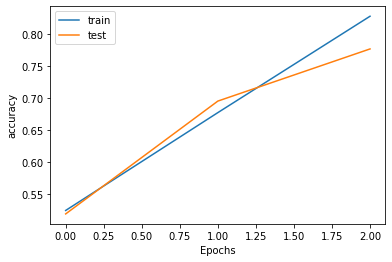

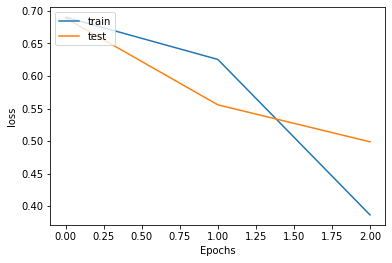

[[0.69612926]
 [0.23825663]
 [0.22451693]
 ...
 [0.274451  ]
 [0.25849822]
 [0.29209372]]
rectified y_hat
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       682
           1       0.76      0.81      0.78       816

    accuracy                           0.76      1498
   macro avg       0.76      0.75      0.75      1498
weighted avg       0.76      0.76      0.76      1498



In [23]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

report = evaluate(model,X_test,y_test)
print(report)

Hyperparameters Optimization

In [24]:
def create_model(batch_size, vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
      tf.keras.layers.GRU(128, return_sequences=True,input_shape=(maxlen, embedding_dim)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [25]:
 # Parameter grid for grid search
param_grid = dict(batch_size=[64, 128, 256],
                      vocab_size=[vocab_size],
                      embedding_dim=[100],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=3,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_result.best_params_)
test_accuracy

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          690700    
                                                                 
 gru_1 (GRU)                 (None, 100, 128)          88320     
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 791,821
Trainable params: 791,821
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
__________________________

0.7550066709518433

In [26]:
def evaluate_cv(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [27]:
report = evaluate_cv(grid_result,X_test,y_test)
print(report)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       682
           1       0.80      0.73      0.76       816

    accuracy                           0.76      1498
   macro avg       0.76      0.76      0.75      1498
weighted avg       0.76      0.76      0.76      1498



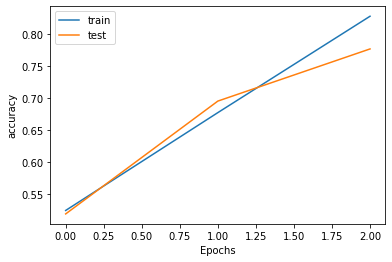

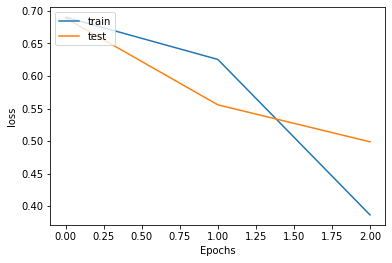

In [28]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
